In [1]:
"""
Created on: Sun. 20 Nov. 2022
Updated on: Fri. 6 Jan. 2023
Author: Mélina Verger

Compute and plot ABROCA.
"""

import abroca_pkg.abroca_compute_function as ComputeAbroca

# For data manipulation
import pandas as pd

# To load the trained models
import pickle

# Plotting module
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=Warning)

## Load data sets and trained models

In [2]:
DATA = pickle.load(open("../data/DATA", "rb"))
SPLIT = pickle.load(open("../data/SPLIT", "rb"))
SFEATURES = pickle.load(open("../data/SFEATURES", "rb"))

print(DATA)
print(SPLIT)
print(SFEATURES)

stInfo
7030
['gender', 'imd_band', 'disability']


In [3]:
# Load test sets

X_test = pd.read_csv("../data/X_test" + "_" + DATA + "_" + SPLIT + ".csv")
y_test = pd.read_csv("../data/y_test" + "_" + DATA + "_" + SPLIT + ".csv")

In [4]:
# Load trained models

MODELS = pickle.load(open("../data/MODELS", "rb"))  # dict with names and trained models
models = MODELS

In [5]:
if "clf_svc" in models:
    del models["clf_svc"]  # except svc model because no probability outputs 

## Prediction **probabilities** of entire $X_{test}$

In [6]:
dict_subsets_PP = dict()

for mod_names in models:

    if mod_names == "clf_lr":
        modl = "lr"
    elif mod_names == "clf_kn":
        modl = "kn"
    elif mod_names == "clf_dt":
        modl = "dt" 
    elif mod_names == "clf_rf":
        modl = "rf"
    elif mod_names == "clf_cnb":
        modl = "cnb"
    elif mod_names == "clf_mnb":
        modl = "mnb"
    else:
        print("Invalid model.")
        exit()

    # y_PP for X_test
    for sensfeat in SFEATURES:
        
        # ALL GROUPS
        dict_subsets_PP["y" + "_PP_" + modl + "_" + sensfeat + "_" + "all"] = models[mod_names].predict_proba(X_test)[:, 1]

## ABROCA

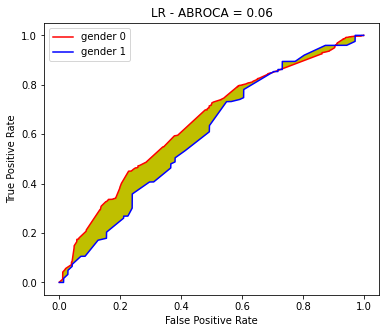

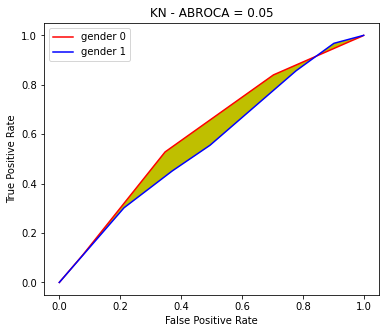

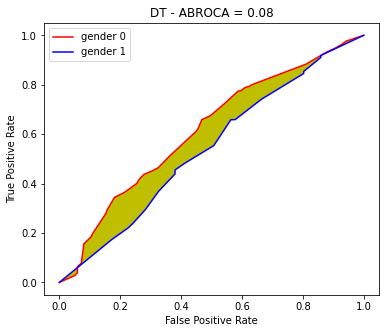

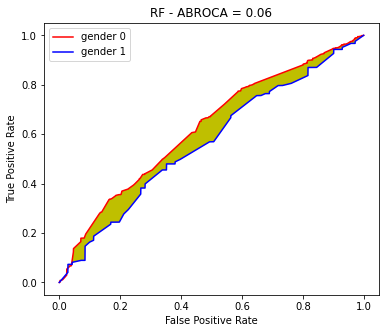

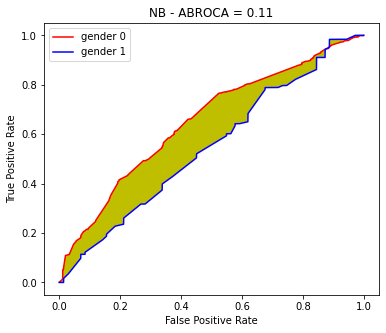

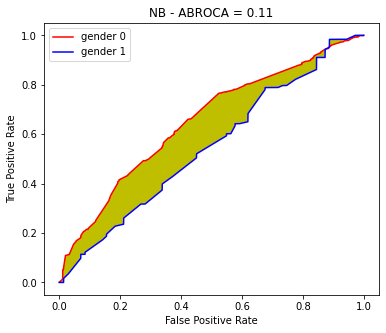

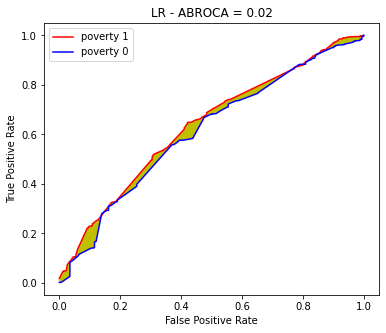

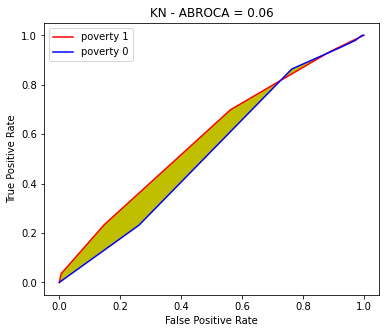

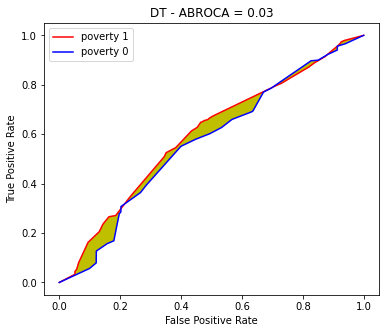

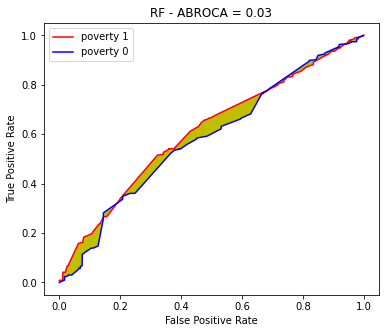

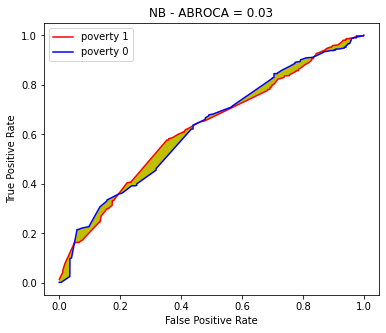

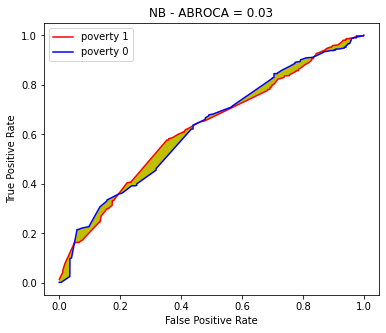

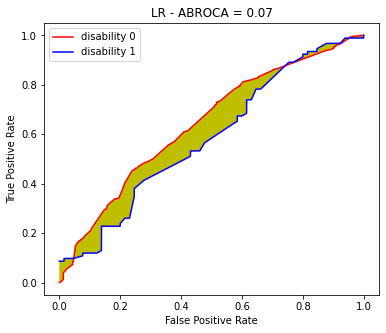

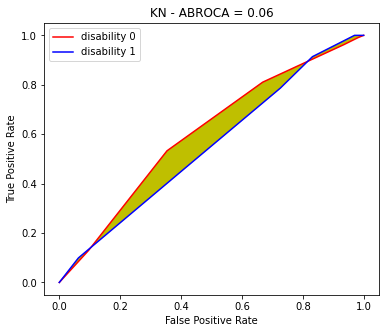

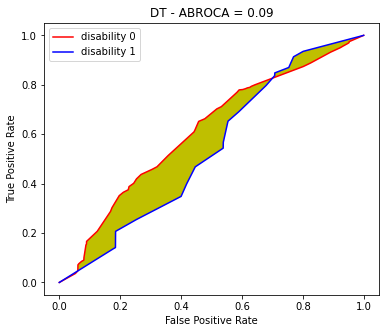

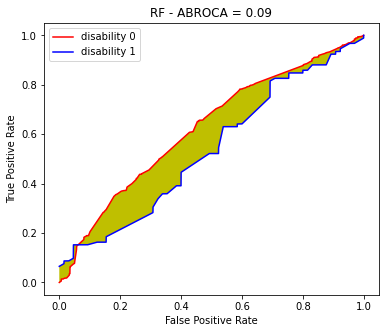

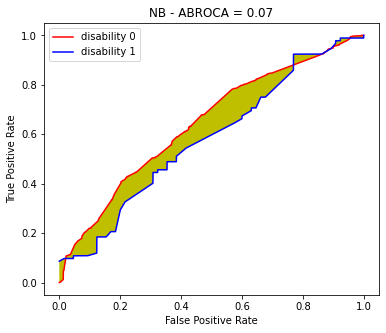

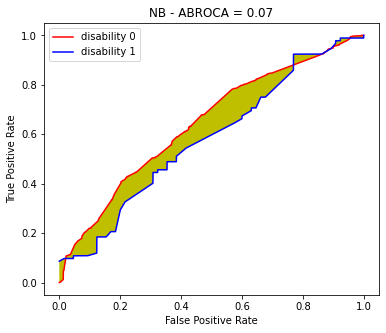

In [7]:
for sensfeat in SFEATURES:

    for mod_name in models:

        if mod_name == "clf_lr":
            modl = "lr"
        elif mod_name == "clf_kn":
            modl = "kn"  # model that generates FutureWarning
        elif mod_name == "clf_dt":
            modl = "dt" 
        elif mod_name == "clf_rf":
            modl = "rf"
        elif mod_names == "clf_cnb":
            modl = "cnb"
        elif mod_names == "clf_mnb":
            modl = "mnb"
        else:
            print("Invalid model.")
            exit()

        # cf. docu abroca py library for the following
        X_test["pred_proba"] = dict_subsets_PP["y" + "_PP_" + modl + "_" + sensfeat + "_" + "all"]
        X_test["final_result"] = y_test
        df_test = X_test

        class1 = 1
        class0 = 0
        if df_test[sensfeat].value_counts().loc[[class1]].values[0] > df_test[sensfeat].value_counts().loc[[class0]].values[0]:  # select by index value (class 0 or class 1)
            majority_group = 1
        else:
            majority_group = 0
        
        
        save_path = "../figures/slice_plot_" + modl + "_" + sensfeat + ".png"
        slice = ComputeAbroca.compute_abroca(model_name=modl,
                                                       df=df_test,
                                                       pred_col='pred_proba',
                                                       label_col='final_result',
                                                       protected_attr_col=sensfeat,
                                                       majority_protected_attr_val=majority_group,
                                                       n_grid=10000,
                                                       plot_slices=True,
                                                       file_name=save_path
                                                       )